<a href="https://colab.research.google.com/github/RochaGerd/Chemistry_with_Python/blob/main/Curso_Python_Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Minicurso No. 13: Noções de Python para Químico(a)s**
##**VII Encontro de Química da UFPB**
##Autor: Prof. Gerd Bruno da Rocha 
###(gbr@academico.ufpb.br e https://www.quantum-chem.pro.br/)
###Links:

1.   <https://github.com/RochaGerd/Chemistry_with_Python>
2.   <https://github.com/pythonchembook>


###Material bibliográfico:

1. Aprendendo Química com Python, Rodrigo Queiroz e Gerd Rocha, 2021, Amazon Book. <https://github.com/pythonchembook>

  Link para compra: <https://www.amazon.com/Aprendendo-Qu%C3%ADmica-com-python-Portuguese/dp/B09LGSG6TY>

2. J. Mueller. Começando a Programar em Python Para Leigos. Alta
Books, 2020.
3. A. Downey. Pense em Python: Pense como um cientista da computação.
Novatec, 2016.

###Conteúdo do Minicurso:

**PARTE 1 (Dia 10/11): Noções de Python** 

1. Histórico do Python e instalação
2. Bibliotecas e módulos
3. Tipos de dados, constantes e variáveis; vetores e matrizes; listas, tuplas e dicionários; 
4. Input e output com arquivos externos
5. Controlando o fluxo de dados do seu programa
6. Repetindo partes do programa
7. Funções;
8. Bibliotecas básicas do Python

**PARTE 2 (Dia 11/11): Aplicações para Químico(a)s**

Bibliotecas de Python para químicos

1. RDKit
2. ASE
3. PySCF
4. AmberTools, Pytraj e NGLView

---

---
#**PARTE 2: Aplicações de Python para Químico(a)s**

Nessa parte do curso vamos explorar diversas bibliotecas de química. 

---

# **1. RDKit**

- <https://www.rdkit.org/>

A partir desse ponto é interessante saber que você pode instalar uma biblioteca do Python, mesmo que ela não esteja disponível no Google Colab.

Para fazer isso basta usar o seguinte comando

- **!pip install** *nome da biblioteca ou pacote*

Ex: **!pip install** *rdkit*

---

**Fonte: Aprendendo Química com Python, Rodrigo Queiroz e Gerd Rocha, 2021, Amazon Book. <https://github.com/pythonchembook>**

In [ ]:
# Instalando RDKit
!pip install rdkit

In [ ]:
# Importando os módulos do RDKit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=False  # <-- Colocar Falso se você quiser PNGs ao invés de SVGs
from rdkit import rdBase
print("Versão da RDKit:", rdBase.rdkitVersion)
print("Versão da RDKit base:", rdBase.boostVersion)

In [ ]:
# Gerar estrutura de linhas a partir do código SMILES
mol = Chem.MolFromSmiles('c1ccccc1')
mol

In [ ]:
# Adiconando hidrogênios a molécula mol
mol_H = Chem.AddHs(mol)
# Contando o número de átomos do objeto "mol_H"
print(f'O número de átomos da molécula benzeno com os hidrogênios é {mol_H.GetNumAtoms()}')

In [ ]:
mol_H

In [ ]:
# Adicionando a numeração dos átomos

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
mol_H

In [ ]:
# Convertendo de Smiles para molécula 2D
smi2 = 'COC1CNC[C@@H](O)C1Cl'
mol2 = Chem.MolFromSmiles(smi2)
mol2

In [ ]:
# Adicionando os hidrogênios
# http://www.qsar4u.com/files/rdkit_tutorial/rdkit.html
mol2_H = Chem.AddHs(mol2)
mol2_H

In [ ]:
# Carregando o módulo AllChem do RDKit
from rdkit.Chem import AllChem
AllChem.EmbedMolecule(mol2_H)
mol2_H

In [ ]:
AllChem.MMFFOptimizeMolecule(mol2_H) # Otimizando a geometria com o campo de força MMFF

In [ ]:
mol2_H

In [ ]:
# Códigos SMILES de 30 solventes orgânicos

solventes = ['c1ccccc1', 'CO', 'CCO', 'Cc1ccccc1', 'Cc1ccc(C)cc1', 'Cc1cccc(C)c1', 'Cc1ccccc1C', 'C1CCCCC1',
             'CCCCCCCCO', 'CCCCC', 'CCCCCC', 'CCCCCCC', 'CC=O', 'CCOC(C)=O', 'CC(=O)C', 'CC#N', 'O=C(O)C', 
             'O=CO', 'CC(C)O', 'CCCCO', 'C(Cl)(Cl)Cl', 'O=CN(C)C', 'CS(C)=O', 'CCOCC', 'CCC(=O)C', 
             'C1=NC=CC=C1', 'C(Cl)(Cl)(Cl)Cl', 'C1CCCO1', 'CCN(CC)CC', 'CCOCCO']
size_solv = len(solventes)
print(size_solv)

In [ ]:
# Converta para um objeto com as estruturas de linhas
solv_smi = size_solv*['']
for ms in range(size_solv): 
    solv_smi[ms] = Chem.MolFromSmiles(solventes[ms]) 

In [ ]:
# Imprima todas as estruturas planas convertidas
n_linha = 4
IPythonConsole.drawOptions.addAtomIndices = False
img = Draw.MolsToGridImage(solv_smi[:size_solv],molsPerRow=n_linha,subImgSize=(200,200))
img

In [ ]:
# Instalando a library pubchempy

!pip install pubchempy

In [ ]:
import pubchempy  # Carregando a bibliotecha PubchemPy

# Usando a PubchemPy para nomear as moléculas.

names_smi = size_solv*['']
for i in range(size_solv):
    smi = solventes[i]
    c = pubchempy.get_compounds(smi, namespace='smiles')
    match = c[0]
    names_smi[i] = match.iupac_name

print(names_smi)

In [ ]:
# Imprima todas as estruturas planas convertidas
n_linha = 4
img = Draw.MolsToGridImage(solv_smi[:], molsPerRow=n_linha, 
                           subImgSize=(300,300),legends=names_smi)
img
# Procurar como salvar essa imagem
#img.save('file.png')  # Tem que colocar returnPNG=False para usar esse comando

# MolDrawing.atomLabelFontSize=18

In [ ]:
# Usando as bibliotecas Pandas (https://pandas.pydata.org/) e SeaBorn (https://seaborn.pydata.org/)

import pandas as pd
import seaborn as sns
# https://www.engineeringtoolbox.com/liquid-dielectric-constants-d_1263.html
# https://krohne.com/en/services/dielectric-constants/

# https://pubchem.ncbi.nlm.nih.gov/

# bp_exp --> Boiling Point (em celcius)
bp_exp = np.array([80.1, 64.6, 78.5, 110.6, 138.4, 139.1, 144, 80.7, 194.7, 36.1, 69, 98, 20.8, 
            77, 56.05, 81.65, 118, 101, 82.4, 117.7, 61.2, 153, 189, 34.5, 79.6, 115.2, 
          76.8, 65, 88.9, 195], dtype=np.float32) + 273.15

# mp_exp --> Melting Point (em celcius)
mp_exp = np.array([5.5, -98, -114.1, -93, 13.3, -47.8, -25.2, 6.6, -14.7, -129.7, -95, -90.6, -123.4, 
    -83.6, -94.7, -43.8, 16.6, 8.3, -88.5, -88.6, -63.4, -60.48, 18.4, -116.2, -86.6, 
    -41.6, -22.6, -108.4, -114.7, -13], dtype=np.float32) + 273.15

# dens_exp --> Density (em g/mL)
dens_exp = np.array([0.8765, 0.791, 0.789, 0.867, 0.861, 0.868, 0.897, 0.7739, 0.8262, 0.626, 0.659, 
    0.684, 0.7834, 0.895, 0.7845, 0.7857, 1.0446, 1.220, 0.785, 0.8095, 1.4788, 0.9445, 
    1.092, 0.713, 0.7999, 0.982, 1.594, 0.8833, 0.728, 1.115], dtype=np.float32)

# diel_exp --> Dielectric constant 
diel_exp = np.array([2.28, 32.6, 24.6, 2.38, 2.27, 2.37, 2.57, 2.02, 10.3, 1.84, 1.89, 1.92, 21.8, 6,
    21.01, 36.64, 6.20, 57.9, 18.3, 17.8, 4.81, 38.25, 47, 4.267, 18.6, 12.3, 2.24, 7.52,
    2.4, 37.7], dtype=np.float32)

labels = ['Boiling Point', 'Melting point', 'Density', 'Dielectric Constant']
data = np.array([bp_exp, mp_exp, dens_exp, diel_exp],dtype=np.float32)
df_data = pd.DataFrame(data.T, columns=labels,index=names_smi)
#df_data = df_data.set_index('Name')

In [ ]:
# Imprimindo os dados no formato do Pandas
df_data.head()

In [ ]:
# Detalhamento estatístico dos dados no formato do Pandas
df_data.describe()

In [ ]:
# Montagem da matriz de correlação entre os dados das propriedades ds solventes
corrMat_solvt = df_data.corr()

In [ ]:
# Matriz de Correlação para as propriedades dos solventes orgânicos

sns_plot = sns.clustermap(corrMat_solvt, cmap="RdBu_r", linecolor='gray', linewidths=0.5)
sns_plot.savefig("CorrMat_solventes.png", dpi=400, transparent=True)

In [ ]:
# Dendograma para solventes com resíduos nas colunas

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 8))
plt.title("Dendograma para Propriedades dos solventes orgânicos")
dend_solv = shc.dendrogram(shc.linkage(df_data, method='ward'), labels=names_smi) # Dados solventes com propriedades nas colunas
plt.xticks(rotation=90)
# OBS: posso mudar os métodos e agrupamentos
plt.savefig('Dendograma_solv_ward.png', format='png', dpi=400, transparent=True)

In [ ]:
# line plot for each variable
# Solventes
plt.figure(figsize=(10,10))

for i in range(len(df_data.columns)):
    # create subplot
    plt.subplot(len(df_data.columns), 1, i+1)
    # get variable name
    namevar = df_data.columns[i]
    # plot data
    plt.plot(df_data[namevar], color='blue')
    # set title
    plt.title(namevar, y=0)
    # turn off ticks to remove clutter
    plt.yticks([])
    plt.xticks([])
plt.show()

In [ ]:
# O próprio Pandas possui uma forma de plotar os dados. 
df_data.plot(figsize=(10, 10))

In [ ]:
# Histogramas das propriedades experimentais

#fig = plt.figure()

plt.subplot(2, 2, 1)
df_data[labels[0]].plot.hist()
plt.xlabel(labels[0], fontsize=10)
#plt.ylabel('$\Psi_{4}(x)$')

plt.subplot(2, 2, 2)
df_data[labels[1]].plot.hist()
plt.xlabel(labels[1], fontsize=10)

plt.subplot(2, 2, 3)
df_data[labels[2]].plot.hist()
plt.xlabel(labels[2], fontsize=10)

plt.subplot(2, 2, 4)
df_data[labels[3]].plot.hist()
plt.xlabel(labels[3], fontsize=10)

plt.tight_layout()
#plt.savefig('Hitogramas_dados_experimentais.png',dpi=400, transparent=True)

plt.show()

In [ ]:
# O próprio objeto possui uma forma de plotar os dados em forma de histogramas
df_data.hist()
plt.tight_layout()
plt.show()

In [ ]:
# usando a biblioteca Seaborn para fazer gráficos estatísticos 
# https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.PairGrid(df_data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [ ]:
# usando a biblioteca Seaborn para fazer gráficos estatísticos 

g = sns.PairGrid(df_data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

---
# **2. ASE**

- <https://wiki.fysik.dtu.dk/ase/>

---

**Fonte: Aprendendo Química com Python, Rodrigo Queiroz e Gerd Rocha, 2021, Amazon Book. <https://github.com/pythonchembook>**


In [ ]:
# Instalando a ASE

!pip install ase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 7.7 MB/s 


In [ ]:
import ase as ase
print("Versão da ASE:", ase.__version__)

Versão da ASE: 3.22.1


In [ ]:
from ase import Atoms                # criar objetos atômicos
from ase.io import write, read           # ler/salvar objetos
from ase.visualize import view           # visualizar objetos

In [ ]:
# Gere uma molécula (ex: H2)
coords = [[0, 0, 0], [0.7, 0, 0]]
labels = ['H', 'H']
mol = Atoms(positions = coords, symbols = labels)

In [ ]:
# confira algumas propriedades úteis do objeto 'mol'
mol.get_chemical_symbols()                # símbolos atômicos

['H', 'H']

In [ ]:
mol.get_atomic_numbers()                   # números atômicos

array([1, 1])

In [ ]:
mol.get_masses()                             # massas molares

array([1.008, 1.008])

In [ ]:
mol.get_chemical_formula()                  # fórmula química

'H2'

In [ ]:
mol.get_all_distances() # distâncias (Angstroms) entre átomos

array([[0. , 0.7],
       [0.7, 0. ]])

In [ ]:
# acesse e modifique as coordenadas xyz do objeto 'mol'
coords = mol.get_positions()     # coords = variável indexada
cm = mol.get_center_of_mass()               # centro de massa
newcoords = coords - cm                   # novas coordenadas
mol.set_positions(newcoords)   # mude as coordenadas de 'mol'
mol.get_positions()   

array([[-0.35,  0.  ,  0.  ],
       [ 0.35,  0.  ,  0.  ]])

In [ ]:
# salve como xyz e png e visualize 'mol'
write('h2.xyz', mol)          # salve o objeto 'mol' como xyz
write('h2.png', mol)          # salve o objeto 'mol' como png
#view(mol)  # No Jupyter notebook, use view(mol, viewer='x3d')
view(mol, viewer = 'x3d')  # Usar quando estiver executando esse código no ambiente do Jupyter notebook

In [ ]:
view(mol, viewer = 'x3d')  # Usar quando estiver executando esse código no ambiente do Jupyter notebook

In [ ]:
# ASE: Manipulando várias moléculas (parte I)
import os
from ase.io import write, read

In [ ]:
molecules = []          # lista para guardar os objetos 'mol'
folders = ['molecules1', 'molecules2']       # sub-diretórios

In [ ]:
# Comando para ver se os diretórios na lista folders já existem
# Sejá existirem, não execute as duas próximas células

!ls molecules*

ls: cannot access 'molecules*': No such file or directory


In [ ]:
!mkdir molecules1

In [ ]:
!mkdir molecules2

In [ ]:
%%file ./molecules1/h2o.xyz
3

O        0.03991322       0.05636463       0.00303043
H       -0.31674678      -0.40040537      -0.89643957
H       -0.31675678      -0.49421537       0.84834043

Writing ./molecules1/h2o.xyz


In [ ]:
%%file ./molecules1/nh3.xyz
4

N       -0.02012330      -0.00086057       0.05691048
H        0.99987670      -0.00086057       0.05691048
H       -0.36012330      -0.82632057      -0.43645952
H       -0.36012330       0.83913943      -0.41126952

Writing ./molecules1/nh3.xyz


In [ ]:
%%file ./molecules2/ch4.xyz
5

C       -0.00000000       0.00000000       0.00000000
H        1.07000000       0.00000000       0.00000000
H       -0.35666000      -0.45677000      -0.89947000
H       -0.35667000       1.00735000       0.05416000
H       -0.35667000      -0.55058000       0.84531000

Writing ./molecules2/ch4.xyz


In [ ]:
%%file ./molecules2/bf3.xyz
4

B       -0.00000000       0.00000000       0.00000000
F        1.10800000       0.00000000       0.00000000
F       -0.55400000      -0.91751000       0.28093000
F       -0.55400000       0.91751000      -0.28093000

Writing ./molecules2/bf3.xyz


In [ ]:
for folder in folders:  # itere sobre os elementos de folders
    os.chdir(folder)       # Vá para o sub-diretório 'folder'
    list_mols = os.listdir()    # gere lista dos arquivos xyz
    for molecule in list_mols:  # itere sobre os arquivos xyz
        mol = read(molecule)     # abra 'molecule' como 'mol'
        coords = mol.get_positions()  # guarde as coordenadas
        cm = mol.get_center_of_mass() # use o centro de massa
        newcoords = coords - cm      # corrija as coordenadas
        mol.set_positions(newcoords)# atualize as coordenadas
        write(molecule, mol)     # salve o arquivo 'molecule'
        molecules.append(mol)        # adicione 'mol' à lista
    os.chdir('../') 

In [ ]:
molecules            # cheque os objetos da lista 'molecules'

[Atoms(symbols='NH3', pbc=False),
 Atoms(symbols='OH2', pbc=False),
 Atoms(symbols='CH4', pbc=False),
 Atoms(symbols='BF3', pbc=False)]

In [ ]:
# ASE: Manipulando várias moléculas (parte II)
import matplotlib.pyplot as plt
import numpy as np
from ase.visualize.plot import plot_atoms

In [ ]:
nmols = len(molecules)  # lista 'molecules' = sessão anterior
sqrt = np.sqrt(nmols)            # grade quadrada de gráficos
if nmols % sqrt == 0:      # 'nmols' é um múltiplo de 'sqrt'?
    grid = int(sqrt)
else:
    grid = int(sqrt) + 1

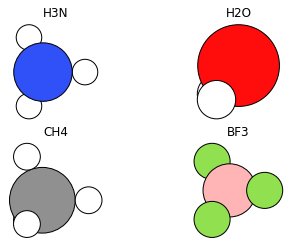

In [ ]:
for i, system in enumerate(molecules):
    plt.subplot(grid, grid, i+1)
    fig = plot_atoms(system) # 'fig =' previne extra outputs
    name = system.get_chemical_formula()
    plt.title(name)
    plt.axis('off')

plt.show()      

In [ ]:
plt.savefig('minhafigura.png', dpi = 400)

<Figure size 432x288 with 0 Axes>

---
# **3. PySCF**

Essa biblioteca realiza cálculos de química quântica em moléculas. É um código aberto e de fácil utilização.  

- <https://pyscf.org/>

Nós iremos executar alguns exemplos de tutoriais do PySCF que estão disponíveis na internet.

**Links interessantes**
- <http://www.cheminfo.org/Chemistry/Cheminformatics/FormatConverter/index.html>
- <https://pubchem.ncbi.nlm.nih.gov/>
- <https://webbook.nist.gov/chemistry/>
- <https://cccbdb.nist.gov/>


**Fonte de Consulta**
- <https://github.com/vinayak2019/python_quantum_chemistry_introductory>
- <https://github.com/pyscf/pyscf/tree/master/examples> 


In [ ]:
# Instalando o PySCF

!pip install pyscf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.2 MB 1.2 MB/s 


Vamos gerar um input para um sistema molecular bem simples. Para isso use a ferramenta openbabel online para criar a estrutura da molécula do etileno. 

In [ ]:
%%file etano.xyz
8

C          5.24120       -4.83080       -0.00000
C          5.99900       -3.53630       -0.00000
H          4.17122       -4.82436        0.00000
H          5.77062       -5.76065        0.00000
H          4.70063       -5.75421        0.00000
H          7.06898       -3.54274        0.00000
H          5.46958       -2.60645        0.00000
H          6.53957       -2.61289        0.00000

Writing etano.xyz


In [ ]:
# Importar os módulos do PySCF importantes para os primeiros cálculos.

from pyscf import gto, scf

In [ ]:
# Ler a geometria xyz 

mol = gto.M(atom="etano.xyz")
mol

In [ ]:
# definir a função de base 
mol.basis = "6-31G"

# definir o método de cálculo
mf = mol.KS()
mf.xc = 'b3lyp'

In [ ]:
# Rodar o cálculo e obter a energia eletrônica (em a.u.)
e_1SCF = mf.kernel()
print()
print("A energia 1SCF da molécula é igual a:", e_1SCF, "em a.u.")

converged SCF energy = -78.0420710705074
A energia 1SCF da molécula é igual a: -78.04207107050743 em a.u.


In [ ]:
# total number of electrons
n = mol.tot_electrons()
n

18

In [ ]:
# display all orbitals
mf.mo_energy

array([-9.80963307, -9.8088176 , -0.71263113, -0.68704264, -0.39885619,
       -0.36227416, -0.33613624, -0.08365444,  0.1018093 ,  0.13348035,
        0.26805234,  0.43958869,  0.48623332,  0.49738259,  0.69390628,
        0.82104482])

In [ ]:
# HOMO is n/2 orbital. But python index starts from 0
homo = mf.mo_energy[int(n/2) - 1]
homo

0.10180929932073307

In [ ]:
# the unit of energy is Hartree. To convert to eV
homo * 27.2114

2.770373567536196

In [ ]:
mol = gto.M(atom="etano.xyz")

# set basis set
mol.basis = "6-31G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# set solvent
mf = mf.DDCOSMO()
mf.with_solvent.eps = 35.688  # Acetonitrile

# run single point energy
mf = mf.run()

#get total energy
neutral_energy_solvent = mf.e_tot

converged SCF energy = -78.0558300601104


In [ ]:
# Para otimizar a geometria com p PySCF é necessário instalar a biblioteca Geometric
!pip install geometric

In [ ]:
from pyscf.geomopt.geometric_solver import optimize

# create the pyscf molecule 
mol = gto.M(atom="etano.xyz")

# set basis set
mol.basis = "6-31G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run optimatization  calculations
mol_eq = optimize(mf)

geometric-optimize called with the following command line:
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-6fbbd932-a35b-45a7-9030-aabe240c18e7.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********      .)


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   5.241200  -4.830800   0.000000    0.000000  0.000000  0.000000
   C   5.999000  -3.536300   0.000000    0.000000  0.000000  0.000000
   H   4.171220  -4.824360   0.000000    0.000000  0.000000  0.000000
   H   5.770620  -5.760650   0.000000    0.000000  0.000000  0.000000
   H   4.700630  -5.754210   0.000000    0.000000  0.000000  0.000000
   H   7.068980  -3.542740   0.000000    0.000000  0.000000  0.000000
   H   5.469580  -2.606450   0.000000    0.000000  0.000000  0.000000
   H   6.539570  -2.612890   0.000000    0.000000  0.000000  0.000000
converged SCF energy = -78.0420710705075
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C    -0.0134930370    -0.0230618931    -0.0000000000
1 C     0.0134930370     0.0230618931    -0.0000000000
2 H     0.0563095240    -0.0326797977    -0.0000000000
3 H    

Step    0 : Gradient = 5.796e-02/6.515e-02 (rms/max) Energy = -78.0420710705
Hessian Eigenvalues: 2.30000e-02 3.93015e-02 3.93015e-02 ... 3.72300e-01 3.72302e-01 3.72302e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   5.233485  -4.843949   0.000000   -0.007715 -0.013149  0.000000
   C   6.006715  -3.523151   0.000000    0.007715  0.013149  0.000000
   H   4.132121  -4.695704   0.000000   -0.039099  0.128656  0.000000
   H   5.901912  -5.731747   0.000000    0.131292  0.028903  0.000000
   H   4.668854  -5.808450   0.000000   -0.031776 -0.054240  0.000000
   H   7.108079  -3.671396   0.000000    0.039099 -0.128656  0.000000
   H   5.338288  -2.635353   0.000000   -0.131292 -0.028903  0.000000
   H   6.571346  -2.558650  -0.000000    0.031776  0.054240 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.145471339851
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0345379273     0.0589843

Step    1 : Displace = 1.004e-01/1.345e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.082e-01/1.624e-01 (rms/max) E (change) = -78.1454713399 (-1.034e-01) Quality = 1.999
Eigenvalues below 1.0000e-05 (-1.1589e+00) - returning guess
Hessian Eigenvalues: 2.30000e-02 3.93015e-02 3.93015e-02 ... 3.72300e-01 3.72302e-01 3.72302e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   5.225556  -4.857487   0.000000   -0.007928 -0.013538  0.000000
   C   6.014644  -3.509613   0.000000    0.007928  0.013538  0.000000
   H   4.161205  -4.524954   0.000000    0.029083  0.170750  0.000000
   H   6.036557  -5.622800   0.000000    0.134645  0.108947  0.000000
   H   4.627802  -5.878568  -0.000000   -0.041052 -0.070118 -0.000000
   H   7.078995  -3.842146   0.000000   -0.029083 -0.170750  0.000000
   H   5.203643  -2.744300   0.000000   -0.134645 -0.108947  0.000000
   H   6.612398  -2.488532  -0.000000    0.041052  0.070118 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.2713867469416
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0465286445     0.079468

Step    2 : Displace = 1.293e-01/1.732e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 6.404e-02/9.209e-02 (rms/max) E (change) = -78.2713867469 (-1.259e-01) Quality = 0.812
Hessian Eigenvalues: 2.30000e-02 3.93015e-02 3.93015e-02 ... 3.72300e-01 3.72302e-01 6.47968e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   5.192506  -4.913824   0.000000   -0.033051 -0.056338  0.000000
   C   6.047693  -3.453279   0.000000    0.033049  0.056335  0.000000
   H   4.228883  -4.379345   0.000000    0.067679  0.145608  0.000000
   H   6.130216  -5.492566   0.000000    0.093659  0.130234  0.000000
   H   4.584903  -5.951588  -0.000000   -0.042899 -0.073020 -0.000000
   H   7.011320  -3.987755   0.000000   -0.067675 -0.145608  0.000000
   H   5.109983  -2.874531   0.000000   -0.093660 -0.130231  0.000000
   H   6.655297  -2.415512  -0.000000    0.042898  0.073020 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.3414387228882
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0674151989     0.115147

Step    3 : Displace = 1.255e-01/1.605e-01 (rms/max) Trust = 2.000e-01 (+) Grad = 6.782e-02/1.334e-01 (rms/max) E (change) = -78.3414387229 (-7.005e-02) Quality = 1.434
Hessian Eigenvalues: 2.30000e-02 3.93015e-02 3.93015e-02 ... 3.72300e-01 3.72302e-01 9.51531e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   5.064675  -5.132102   0.000000   -0.127831 -0.218278  0.000000
   C   6.175525  -3.234998   0.000000    0.127833  0.218280  0.000000
   H   4.326409  -4.303396   0.000000    0.097526  0.075950  0.000000
   H   6.148621  -5.370382   0.000000    0.018405  0.122184  0.000000
   H   4.455444  -6.172586  -0.000000   -0.129460 -0.220998 -0.000000
   H   6.913792  -4.063708   0.000000   -0.097528 -0.075953  0.000000
   H   5.091576  -2.996719   0.000000   -0.018407 -0.122188  0.000000
   H   6.784759  -2.194510  -0.000000    0.129462  0.221002 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.4563679152488
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0608092241     0.103814

Step    4 : Displace = 2.001e-01/2.561e-01 (rms/max) Trust = 2.828e-01 (+) Grad = 7.047e-02/1.203e-01 (rms/max) E (change) = -78.4563679152 (-1.149e-01) Quality = -0.392
Failed inverse iteration - checking coordinate system
Internal coordinate system may have changed
-- Added: --
Angle 3-1-4
Angle 6-2-7
Translation-X 1,3-5
Translation-X 2,6-8
Translation-Y 1,3-5
Translation-Y 2,6-8
Translation-Z 1,3-5
Translation-Z 2,6-8
Rotation-A 1,3-5
Rotation-A 2,6-8
Rotation-B 1,3-5
Rotation-B 2,6-8
Rotation-C 1,3-5
Rotation-C 2,6-8
-- Deleted: --
Distance 1-2
Angle 3-1-5
Angle 6-2-8
LinearAngleX 2-1-5
LinearAngleY 2-1-5
LinearAngleX 1-2-8
LinearAngleY 1-2-8
Out-of-Plane 1-2-3-4
Out-of-Plane 1-2-3-5
Out-of-Plane 1-2-4-5
Out-of-Plane 2-1-6-7
Out-of-Plane 2-1-6-8
Out-of-Plane 2-1-7-8
Dihedral 3-1-2-6
Dihedral 3-1-2-7
Dihedral 4-1-2-6
Dihedral 4-1-2-7
Translation-X 1-8
Translation-Y 1-8
Translation-Z 1-8
Rotation-A 1-8
Rotation-B 1-8
Rotation-C 1-8
Refreshing coordinate system and resetting rotations


Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.993048  -5.236308   0.000000   -0.071627 -0.104207 -0.000000
   C   6.247152  -3.130792   0.000000    0.071627  0.104207 -0.000000
   H   4.307460  -4.388159   0.000000   -0.018949 -0.084763  0.000000
   H   6.063552  -5.444571   0.000000   -0.085069 -0.074190  0.000000
   H   4.438353  -6.238582  -0.000000   -0.017091 -0.065997 -0.000000
   H   6.932740  -3.978943   0.000000    0.018948  0.084765  0.000000
   H   5.176646  -2.922529   0.000000    0.085070  0.074190  0.000000
   H   6.801849  -2.128516  -0.000000    0.017090  0.065995 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.4982424158507
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0344182475     0.070048

Step    5 : Displace = 1.011e-01/1.264e-01 (rms/max) Trust = 1.000e-01 (-) Grad = 4.342e-02/7.805e-02 (rms/max) E (change) = -78.4982424159 (-4.187e-02) Quality = 0.797
Hessian Eigenvalues: 4.50000e-02 4.50000e-02 4.99999e-02 ... 3.26146e-01 3.26182e-01 3.82193e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.914812  -5.343930  -0.000000   -0.078236 -0.107621 -0.000000
   C   6.325389  -3.023170  -0.000000    0.078237  0.107621 -0.000000
   H   4.393309  -4.410774   0.000000    0.085849 -0.022616  0.000000
   H   5.986460  -5.391362   0.000000   -0.077092  0.053209  0.000000
   H   4.441970  -6.265307  -0.000000    0.003617 -0.026725 -0.000000
   H   6.846890  -3.956324   0.000000   -0.085851  0.022619  0.000000
   H   5.253743  -2.975737   0.000000    0.077097 -0.053208  0.000000
   H   6.798228  -2.101795  -0.000000   -0.003620  0.026721 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.5136123039294
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C    -0.0271965513    -0.023670

Step    6 : Displace = 9.366e-02/1.330e-01 (rms/max) Trust = 1.415e-01 (+) Grad = 3.380e-02/5.547e-02 (rms/max) E (change) = -78.5136123039 (-1.537e-02) Quality = 0.663
Hessian Eigenvalues: 4.50000e-02 4.50000e-02 5.00000e-02 ... 3.26182e-01 3.26456e-01 4.65686e-01



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.875436  -5.468581  -0.000000   -0.039376 -0.124651 -0.000000
   C   6.364764  -2.898520  -0.000000    0.039376  0.124650 -0.000000
   H   4.333817  -4.523687   0.000000   -0.059492 -0.112913  0.000000
   H   5.968940  -5.455329   0.000000   -0.017520 -0.063967  0.000000
   H   4.293294  -6.418889  -0.000000   -0.148677 -0.153581 -0.000000
   H   6.906383  -3.843414   0.000000    0.059493  0.112911  0.000000
   H   5.271260  -2.911771   0.000000    0.017517  0.063966  0.000000
   H   6.946907  -1.948210  -0.000000    0.148679  0.153585 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.5250206762846
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0064422799     0.008017

Step    7 : Displace = 1.445e-01/2.135e-01 (rms/max) Trust = 1.415e-01 (=) Grad = 1.140e-02/1.772e-02 (rms/max) E (change) = -78.5250206763 (-1.141e-02) Quality = 0.737
Hessian Eigenvalues: 4.50000e-02 4.50000e-02 5.00000e-02 ... 3.26182e-01 3.26937e-01 5.71814e-01



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.876612  -5.465767  -0.000000    0.001176  0.002814 -0.000000
   C   6.363588  -2.901333  -0.000000   -0.001176 -0.002813 -0.000000
   H   4.317562  -4.528597   0.000000   -0.016255 -0.004910  0.000000
   H   5.965900  -5.474842   0.000000   -0.003040 -0.019513  0.000000
   H   4.307542  -6.403026  -0.000000    0.014249  0.015862 -0.000000
   H   6.922638  -3.838503   0.000000    0.016256  0.004910  0.000000
   H   5.274300  -2.892258   0.000000    0.003040  0.019514  0.000000
   H   6.932658  -1.964074  -0.000000   -0.014249 -0.015864 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.5262969659089
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0053100330    -0.000810

Step    8 : Displace = 1.690e-02/2.131e-02 (rms/max) Trust = 1.415e-01 (=) Grad = 4.464e-03/5.372e-03 (rms/max) E (change) = -78.5262969659 (-1.276e-03) Quality = 1.235
Hessian Eigenvalues: 4.50000e-02 4.50000e-02 4.99927e-02 ... 3.26182e-01 3.40349e-01 4.12889e-01



Geometry optimization cycle 10
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.857322  -5.475560  -0.000000   -0.019289 -0.009793 -0.000000
   C   6.382878  -2.891540  -0.000000    0.019290  0.009793 -0.000000
   H   4.312330  -4.533530   0.000000   -0.005232 -0.004933  0.000000
   H   5.943236  -5.495167   0.000000   -0.022664 -0.020325  0.000000
   H   4.318571  -6.422904  -0.000000    0.011028 -0.019878 -0.000000
   H   6.927869  -3.833570   0.000000    0.005231  0.004933  0.000000
   H   5.296965  -2.871932   0.000000    0.022665  0.020325  0.000000
   H   6.921629  -1.944195  -0.000000   -0.011029  0.019878 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.5267053391787
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C    -0.0012706571    -0.00097

Step    9 : Displace = 2.215e-02/3.058e-02 (rms/max) Trust = 2.001e-01 (+) Grad = 2.112e-03/2.751e-03 (rms/max) E (change) = -78.5267053392 (-4.084e-04) Quality = 0.874
Hessian Eigenvalues: 4.50000e-02 4.50000e-02 4.99505e-02 ... 3.26182e-01 3.55838e-01 4.51027e-01



Geometry optimization cycle 11
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.850103  -5.493297  -0.000000   -0.007219 -0.017737 -0.000000
   C   6.390097  -2.873803  -0.000000    0.007219  0.017737 -0.000000
   H   4.298823  -4.557381   0.000000   -0.013508 -0.023851  0.000000
   H   5.937105  -5.511549   0.000000   -0.006130 -0.016381  0.000000
   H   4.303385  -6.434696  -0.000000   -0.015186 -0.011792 -0.000000
   H   6.941377  -3.809719   0.000000    0.013508  0.023852  0.000000
   H   5.303095  -2.855552   0.000000    0.006130  0.016381  0.000000
   H   6.936815  -1.932404  -0.000000    0.015186  0.011791 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.5269617439142
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C    -0.0015021696    -0.00064

Step   10 : Displace = 2.117e-02/2.751e-02 (rms/max) Trust = 2.830e-01 (+) Grad = 1.759e-03/2.999e-03 (rms/max) E (change) = -78.5269617439 (-2.564e-04) Quality = 1.347
Hessian Eigenvalues: 3.89127e-02 4.50000e-02 4.50000e-02 ... 3.38146e-01 3.97815e-01 4.55474e-01



Geometry optimization cycle 12
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.837992  -5.516759  -0.000000   -0.012112 -0.023462 -0.000000
   C   6.402208  -2.850341  -0.000000    0.012112  0.023462 -0.000000
   H   4.284700  -4.579245   0.000000   -0.014123 -0.021864  0.000000
   H   5.925704  -5.532848   0.000000   -0.011401 -0.021299  0.000000
   H   4.287115  -6.459249  -0.000000   -0.016270 -0.024553 -0.000000
   H   6.955500  -3.787855   0.000000    0.014123  0.021863  0.000000
   H   5.314496  -2.834252   0.000000    0.011401  0.021300  0.000000
   H   6.953085  -1.907851  -0.000000    0.016270  0.024553 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.5271006347497
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0006706144    -0.00060

Step   11 : Displace = 2.658e-02/2.945e-02 (rms/max) Trust = 3.000e-01 (+) Grad = 6.304e-04/9.050e-04 (rms/max) E (change) = -78.5271006347 (-1.389e-04) Quality = 1.192
Hessian Eigenvalues: 2.79830e-02 4.50000e-02 4.50000e-02 ... 3.66422e-01 4.07108e-01 4.45019e-01



Geometry optimization cycle 13
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.831614  -5.525790  -0.000000   -0.006378 -0.009031 -0.000000
   C   6.408586  -2.841310  -0.000000    0.006378  0.009031 -0.000000
   H   4.280418  -4.587974   0.000000   -0.004282 -0.008729  0.000000
   H   5.919519  -5.541197   0.000000   -0.006185 -0.008349  0.000000
   H   4.282050  -6.469542  -0.000000   -0.005066 -0.010293 -0.000000
   H   6.959782  -3.779125   0.000000    0.004282  0.008730  0.000000
   H   5.320680  -2.825903   0.000000    0.006184  0.008349  0.000000
   H   6.958151  -1.897558  -0.000000    0.005066  0.010292 -0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.5271168834897
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C    -0.0000508034     0.00020

Step   12 : Displace = 1.068e-02/1.147e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.446e-04/2.077e-04 (rms/max) E (change) = -78.5271168835 (-1.625e-05) Quality = 1.124
Hessian Eigenvalues: 2.35339e-02 4.50000e-02 4.50000e-02 ... 3.89574e-01 4.03873e-01 4.42890e-01



Geometry optimization cycle 14
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.830475  -5.527711  -0.000000   -0.001139 -0.001920 -0.000000
   C   6.409725  -2.839389  -0.000000    0.001140  0.001921 -0.000000
   H   4.279461  -4.589457   0.000000   -0.000958 -0.001483  0.000000
   H   5.918332  -5.543136   0.000000   -0.001187 -0.001939  0.000000
   H   4.281184  -6.471542  -0.000000   -0.000866 -0.002000 -0.000000
   H   6.960739  -3.777643   0.000000    0.000957  0.001482  0.000000
   H   5.321868  -2.823964   0.000000    0.001188  0.001939  0.000000
   H   6.959016  -1.895557  -0.000000    0.000865  0.002001 -0.000000
converged SCF energy = -78.5271174270761
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0000136698    -0.0000452057     0.0000000000
1 C    -0.0000135432     0.0000452704     0.0000000000
2 H    -0.0000195446     0.0000385373    -0.0000000000
3 H   

Step   13 : Displace = 2.123e-03/2.281e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 3.263e-05/4.725e-05 (rms/max) E (change) = -78.5271174271 (-5.436e-07) Quality = 1.047
Hessian Eigenvalues: 2.22449e-02 4.50000e-02 4.50000e-02 ... 3.88511e-01 4.34632e-01 4.48592e-01



Geometry optimization cycle 15
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.830475  -5.527772  -0.000000   -0.000000 -0.000061 -0.000000
   C   6.409725  -2.839328  -0.000000   -0.000000  0.000061 -0.000000
   H   4.279520  -4.589543   0.000000    0.000059 -0.000086  0.000000
   H   5.918332  -5.543267   0.000000    0.000000 -0.000131  0.000000
   H   4.281119  -6.471582  -0.000000   -0.000065 -0.000040 -0.000000
   H   6.960681  -3.777557   0.000000   -0.000058  0.000087  0.000000
   H   5.321867  -2.823833   0.000000   -0.000001  0.000131  0.000000
   H   6.959082  -1.895518  -0.000000    0.000066  0.000039 -0.000000
converged SCF energy = -78.5271172969507
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C    -0.0000082565    -0.0000132263     0.0000000000
1 C    -0.0000103153    -0.0000180697     0.0000000000
2 H     0.0000173201    -0.0000270874    -0.0000000000
3 H   

Step   14 : Displace = 9.664e-05/1.323e-04 (rms/max) Trust = 3.000e-01 (=) Grad = 3.325e-05/4.615e-05 (rms/max) E (change) = -78.5271172970 (+1.301e-07) Quality = -22.544
Hessian Eigenvalues: 2.22449e-02 4.50000e-02 4.50000e-02 ... 3.88511e-01 4.34632e-01 4.48592e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 44.300 seconds


In [ ]:
# save the optimized geometry for visualization
mol_eq.tofile("opt_etano.xyz")

'8\nXYZ from PySCF\nC           4.83047       -5.52777       -0.00000\nC           6.40972       -2.83933       -0.00000\nH           4.27952       -4.58954        0.00000\nH           5.91833       -5.54327        0.00000\nH           4.28112       -6.47158       -0.00000\nH           6.96068       -3.77756        0.00000\nH           5.32187       -2.82383        0.00000\nH           6.95908       -1.89552       -0.00000'

In [ ]:
conv_params = {
    'convergence_energy': 1e-1,  # Eh
    'convergence_grms': 3e-1,    # Eh/Bohr
    'convergence_gmax': 4.5e-1,  # Eh/Bohr
    'convergence_drms': 1.2e-1,  # Angstrom
    'convergence_dmax': 1.8e-1,  # Angstrom
}

mol_eq = optimize(mf, **conv_params)

geometric-optimize called with the following command line:
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-6fbbd932-a35b-45a7-9030-aabe240c18e7.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********      .)


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   5.241200  -4.830800   0.000000    0.000000  0.000000  0.000000
   C   5.999000  -3.536300   0.000000    0.000000  0.000000  0.000000
   H   4.171220  -4.824360   0.000000    0.000000  0.000000  0.000000
   H   5.770620  -5.760650   0.000000    0.000000  0.000000  0.000000
   H   4.700630  -5.754210   0.000000    0.000000  0.000000  0.000000
   H   7.068980  -3.542740   0.000000    0.000000  0.000000  0.000000
   H   5.469580  -2.606450   0.000000    0.000000  0.000000  0.000000
   H   6.539570  -2.612890   0.000000    0.000000  0.000000  0.000000
converged SCF energy = -78.0420710705076
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C    -0.0134930370    -0.0230618931     0.0000000000
1 C     0.0134930370     0.0230618931     0.0000000000
2 H     0.0563095240    -0.0326797977    -0.0000000000
3 H    

Step    0 : Gradient = 5.796e-02/6.515e-02 (rms/max) Energy = -78.0420710705
Hessian Eigenvalues: 2.30000e-02 3.93015e-02 3.93015e-02 ... 3.72300e-01 3.72302e-01 3.72302e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   5.233485  -4.843949  -0.000000   -0.007715 -0.013149 -0.000000
   C   6.006715  -3.523151  -0.000000    0.007715  0.013149 -0.000000
   H   4.132121  -4.695704   0.000000   -0.039099  0.128656  0.000000
   H   5.901912  -5.731747   0.000000    0.131292  0.028903  0.000000
   H   4.668854  -5.808450   0.000000   -0.031776 -0.054240  0.000000
   H   7.108079  -3.671396  -0.000000    0.039099 -0.128656 -0.000000
   H   5.338288  -2.635353  -0.000000   -0.131292 -0.028903 -0.000000
   H   6.571346  -2.558650   0.000000    0.031776  0.054240  0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.1454713398508
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0345379274     0.058984

Step    1 : Displace = 1.004e-01/1.345e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.082e-01/1.624e-01 (rms/max) E (change) = -78.1454713399 (-1.034e-01) Quality = 1.999
Eigenvalues below 1.0000e-05 (-1.1589e+00) - returning guess
Hessian Eigenvalues: 2.30000e-02 3.93015e-02 3.93015e-02 ... 3.72300e-01 3.72302e-01 3.72302e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   5.225556  -4.857487  -0.000000   -0.007928 -0.013538 -0.000000
   C   6.014644  -3.509613  -0.000000    0.007928  0.013538 -0.000000
   H   4.161205  -4.524954  -0.000000    0.029083  0.170750 -0.000000
   H   6.036557  -5.622800  -0.000000    0.134645  0.108947 -0.000000
   H   4.627802  -5.878568   0.000000   -0.041052 -0.070118  0.000000
   H   7.078995  -3.842146  -0.000000   -0.029083 -0.170750 -0.000000
   H   5.203643  -2.744300  -0.000000   -0.134645 -0.108947 -0.000000
   H   6.612398  -2.488532   0.000000    0.041052  0.070118  0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.2713867469442
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0465285981     0.079468

Step    2 : Displace = 1.293e-01/1.732e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 6.404e-02/9.209e-02 (rms/max) E (change) = -78.2713867469 (-1.259e-01) Quality = 0.812
Hessian Eigenvalues: 2.30000e-02 3.93015e-02 3.93015e-02 ... 3.72300e-01 3.72302e-01 6.47968e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   5.192506  -4.913824  -0.000000   -0.033050 -0.056337 -0.000000
   C   6.047693  -3.453278  -0.000000    0.033049  0.056335 -0.000000
   H   4.228883  -4.379345  -0.000000    0.067678  0.145608 -0.000000
   H   6.130216  -5.492566  -0.000000    0.093659  0.130234 -0.000000
   H   4.584903  -5.951588   0.000000   -0.042898 -0.073020  0.000000
   H   7.011320  -3.987755  -0.000000   -0.067675 -0.145608 -0.000000
   H   5.109983  -2.874532  -0.000000   -0.093660 -0.130231 -0.000000
   H   6.655297  -2.415512   0.000000    0.042898  0.073020  0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.3414387228178
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0674152439     0.115147

Step    3 : Displace = 1.255e-01/1.605e-01 (rms/max) Trust = 2.000e-01 (+) Grad = 6.782e-02/1.334e-01 (rms/max) E (change) = -78.3414387228 (-7.005e-02) Quality = 1.434
Hessian Eigenvalues: 2.30000e-02 3.93015e-02 3.93015e-02 ... 3.72300e-01 3.72302e-01 9.51531e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   5.064675  -5.132102  -0.000000   -0.127831 -0.218278 -0.000000
   C   6.175525  -3.234998  -0.000000    0.127832  0.218280 -0.000000
   H   4.326409  -4.303396  -0.000000    0.097526  0.075950 -0.000000
   H   6.148621  -5.370381  -0.000000    0.018405  0.122184 -0.000000
   H   4.455444  -6.172586   0.000000   -0.129460 -0.220998  0.000000
   H   6.913792  -4.063707  -0.000000   -0.097528 -0.075953 -0.000000
   H   5.091576  -2.996719  -0.000000   -0.018407 -0.122187 -0.000000
   H   6.784758  -2.194511   0.000000    0.129462  0.221001  0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.4563679151885
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0608092131     0.103814

Step    4 : Displace = 2.001e-01/2.561e-01 (rms/max) Trust = 2.828e-01 (+) Grad = 7.047e-02/1.203e-01 (rms/max) E (change) = -78.4563679152 (-1.149e-01) Quality = -0.392
Failed inverse iteration - checking coordinate system
Internal coordinate system may have changed
-- Added: --
Angle 3-1-4
Angle 6-2-7
Translation-X 1,3-5
Translation-X 2,6-8
Translation-Y 1,3-5
Translation-Y 2,6-8
Translation-Z 1,3-5
Translation-Z 2,6-8
Rotation-A 1,3-5
Rotation-A 2,6-8
Rotation-B 1,3-5
Rotation-B 2,6-8
Rotation-C 1,3-5
Rotation-C 2,6-8
-- Deleted: --
Distance 1-2
Angle 3-1-5
Angle 6-2-8
LinearAngleX 2-1-5
LinearAngleY 2-1-5
LinearAngleX 1-2-8
LinearAngleY 1-2-8
Out-of-Plane 1-2-3-4
Out-of-Plane 1-2-3-5
Out-of-Plane 1-2-4-5
Out-of-Plane 2-1-6-7
Out-of-Plane 2-1-6-8
Out-of-Plane 2-1-7-8
Dihedral 3-1-2-6
Dihedral 3-1-2-7
Dihedral 4-1-2-6
Dihedral 4-1-2-7
Translation-X 1-8
Translation-Y 1-8
Translation-Z 1-8
Rotation-A 1-8
Rotation-B 1-8
Rotation-C 1-8
Refreshing coordinate system and resetting rotations


Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   C   4.993048  -5.236308  -0.000000   -0.071627 -0.104207  0.000000
   C   6.247152  -3.130792  -0.000000    0.071627  0.104207  0.000000
   H   4.307460  -4.388159  -0.000000   -0.018949 -0.084763 -0.000000
   H   6.063552  -5.444571  -0.000000   -0.085069 -0.074190 -0.000000
   H   4.438353  -6.238582   0.000000   -0.017091 -0.065996  0.000000
   H   6.932740  -3.978943  -0.000000    0.018948  0.084765 -0.000000
   H   5.176646  -2.922529  -0.000000    0.085070  0.074190 -0.000000
   H   6.801849  -2.128516   0.000000    0.017090  0.065995  0.000000

WARN: Large deviations found between the input molecule and the molecule from chkfile
Initial guess density matrix may have large error.

converged SCF energy = -78.4982424158307
--------------- SCF_Scanner gradients ---------------
         x                y                z
0 C     0.0344182547     0.070048

Step    5 : Displace = 1.011e-01/1.264e-01 (rms/max) Trust = 1.000e-01 (-) Grad = 4.342e-02/7.805e-02 (rms/max) E (change) = -78.4982424158 (-4.187e-02) Quality = 0.797
Hessian Eigenvalues: 4.50000e-02 4.50000e-02 5.00000e-02 ... 3.26148e-01 3.26180e-01 3.26183e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 19.338 seconds


In [ ]:
# create a molecule object
mol = gto.M(atom="opt_etano.xyz")

# set basis set
mol.basis = "6-31G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

# run frequency calculation
mf.run()
hessian = mf.Hessian().kernel()

converged SCF energy = -78.5271174346636


In [ ]:
from pyscf.hessian import thermo

# getting the frequncy data from the calculation
freq_info = thermo.harmonic_analysis(mf.mol, hessian)
freq_info["freq_wavenumber"]

array([   0.        +480.65534529j,    0.        +252.0120034j ,
         81.16585507  +0.j        ,  120.97037563  +0.j        ,
        191.69601632  +0.j        ,  203.64675859  +0.j        ,
        332.46549195  +0.j        ,  480.65147866  +0.j        ,
       1522.77876951  +0.j        , 1547.11380903  +0.j        ,
       1553.43804004  +0.j        , 1577.39999035  +0.j        ,
       3320.57464476  +0.j        , 3347.09586226  +0.j        ,
       3602.83241533  +0.j        , 3606.64512886  +0.j        ,
       3633.81218551  +0.j        , 3643.59334629  +0.j        ])

---
## **3.1 - Tarefa: Calcule a diferença de energia entre as conformações do cis-buteno e trans-buteno**

In [ ]:
# Dica: usar o portal pubchem e pesquisar as substâncias para descobrir os SMILES

---
# **4. AmberTools, Pytraj, NGLView**

---

**Fonte: Aprendendo Química com Python, Rodrigo Queiroz e Gerd Rocha, 2021, Amazon Book. <https://github.com/pythonchembook>**

In [ ]:
!pip install -q nglview pytraj
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Verificando a versão da NGL Viewer instalada
import nglview as nv
print('Versão do NGLView --> ', nv.__version__)

Versão do NGLView -->  3.0.3


In [ ]:
# Carregando a estrutura da proteína 2CI2 do banco de dados PDB (https://www.rcsb.org/structure/2CI2) 
view1 = nv.show_pdbid("2ci2")  
view1

NGLWidget()

In [ ]:
# Para modificar a representação do objeto "view1" e salvar a figura
view1.parameters = dict(theme='light')
view1.download_image(filename='2ci2.png', factor=15, trim=True)

---

In [ ]:
import pytraj as pt
print('Versão do PyTraj --> ', pt.__version__)

Versão do PyTraj -->  2.0.5


---

In [ ]:
# Instalando o Conda no Colab
!pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:43
🔁 Restarting kernel...


In [ ]:
!conda --version

conda 4.14.0


In [ ]:
!which conda

/usr/local/bin/conda


In [ ]:
# Instalando o AMBERTools

!conda install -c conda-forge ambertools

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

###**Realizando a dinâmica molecular**

In [ ]:
%%file leap.inp
source leaprc.protein.ff14SB
seq = sequence {NALA ALA ALA ALA ALA CALA}
set default PBradii mbondi3
saveamberparm seq peptide.top peptide_ini.crd
savepdb seq peptide_ini.pdb
quit

Writing leap.inp


In [ ]:
# Para executar um comando no Linux
!/usr/local/bin/tleap -f leap.inp > leap.log

In [ ]:
!ls /bin/

In [ ]:
!find / -name tleap

In [ ]:
!more peptide_ini.pdb

ATOM      1  N   ALA     1       3.326   1.548  -0.000  1.00  0.00
ATOM      2  H1  ALA     1       4.046   0.840  -0.000  1.00  0.00
ATOM      3  H2  ALA     1       2.823   1.500  -0.875  1.00  0.00
ATOM      4  H3  ALA     1       2.823   1.500   0.875  1.00  0.00
ATOM      5  CA  ALA     1       3.970   2.846  -0.000  1.00  0.00
ATOM      6  HA  ALA     1       3.672   3.400  -0.890  1.00  0.00
ATOM      7  CB  ALA     1       3.577   3.654   1.232  1.00  0.00
ATOM      8  HB1 ALA     1       3.877   3.116   2.131  1.00  0.00
ATOM      9  HB2 ALA     1       4.075   4.623   1.206  1.00  0.00
ATOM     10  HB3 ALA     1       2.497   3.801   1.241  1.00  0.00
ATOM     11  C   ALA     1       5.486   2.705  -0.000  1.00  0.00
ATOM     12  O   ALA     1       6.009   1.593  -0.000  1.00  0.00
ATOM     13  N   ALA     2       6.191   3.839  -0.000  1.00  0.00
ATOM     14  H   ALA     2       5.715   4.730  -0.000  1.00  0.00
ATOM     15  CA  ALA     2       7.640   3.839  -0.000  1.00  

In [ ]:
%%file min_implicit.inp
Minimizacao da energia
&cntrl
imin=1, maxcyc=5000, ncyc=1000,
cut=999., igb=8, ntb=0, ntpr=100
&end

Writing min_implicit.inp


In [ ]:
!/usr/local/bin/sander -O -i min_implicit.inp -p peptide.top -c peptide_ini.crd -r min_implicit.rst7

In [ ]:
# Carrega a estrutura otimizada com a PyTraj
ref_implicit_min = pt.load('min_implicit.rst7', top='peptide.top')

# Visualizar a estrutura 
from google.colab import output
output.enable_custom_widget_manager()
view_min_implicit = nv.show_pytraj(ref_implicit_min)
view_min_implicit.add_ball_and_stick()
view_min_implicit.add_cartoon()
view_min_implicit.parameters = dict(camera_type='perpective', background_color='black',fog_near=60, clip_dist=0)
view_min_implicit

NGLWidget()

In [ ]:
view_min_implicit

NGLWidget(n_components=2)

In [ ]:
view_min_implicit.render_image()

Image(value=b'', width='99%')

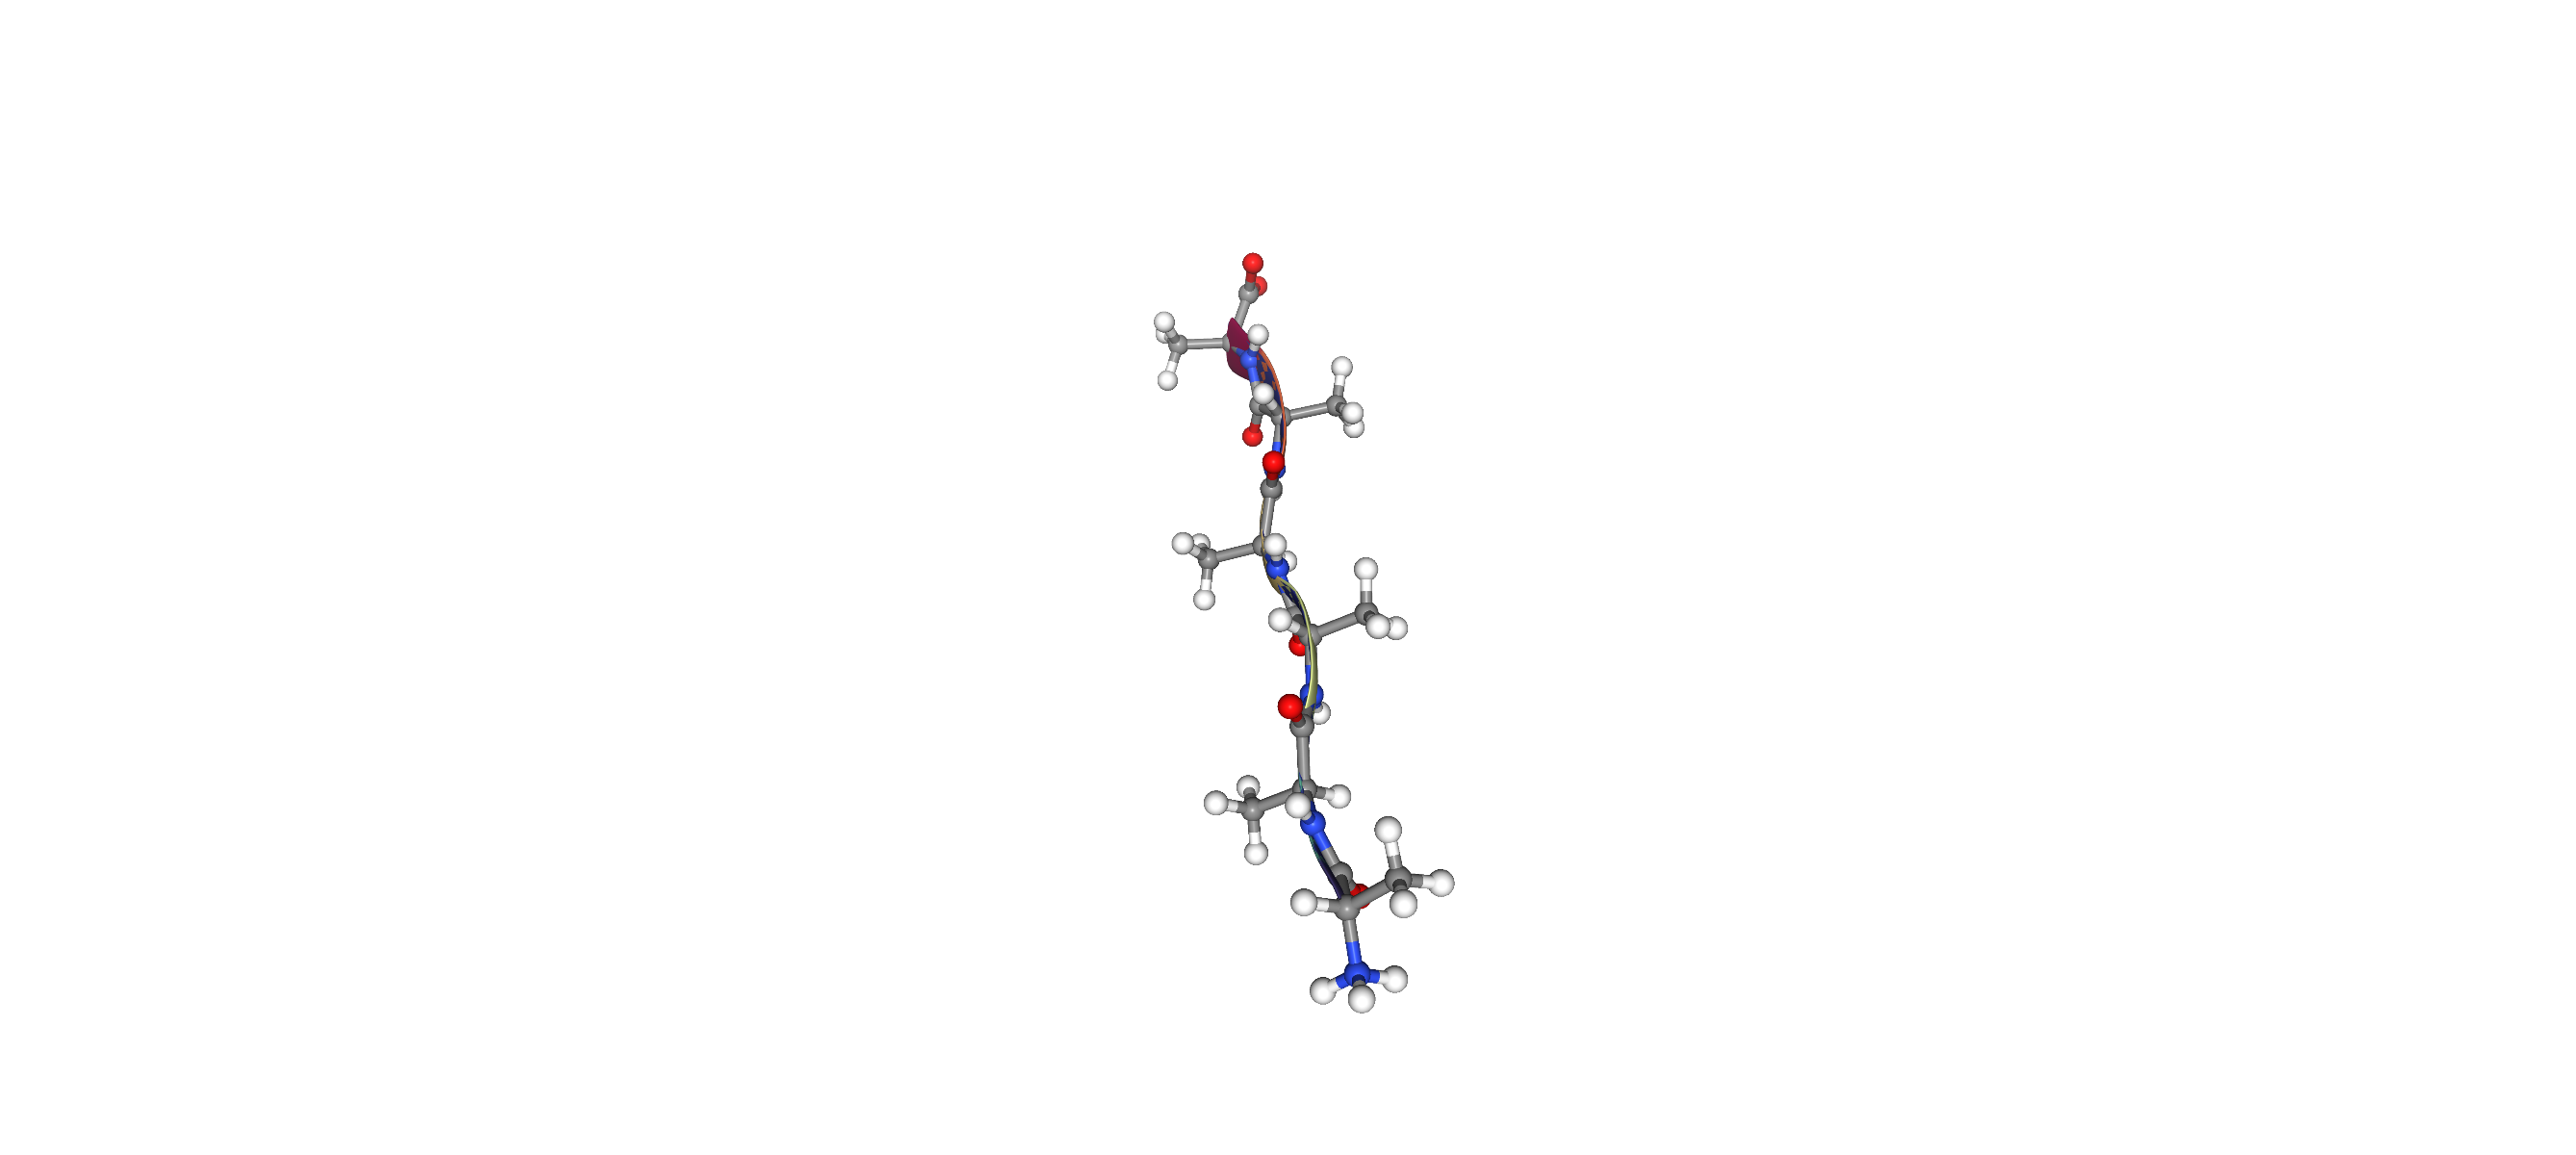

In [ ]:
view_min_implicit._display_image()

In [ ]:
view_min_implicit.parameters = dict(theme='light')
view_min_implicit.download_image(filename='hexa_ala_min_imp.png', factor=8, trim=True)

In [ ]:
# Monta input para dinâmica molecular NVT
# OBS: Não usar comentários na caixa que escreve o arquivo "md_implicit.in"

In [ ]:
%%file md_implicit.inp
MD NVT, 500 ps
&cntrl
    imin = 0, nstlim = 250000, dt = 0.002, ntf = 2, nscm = 1000, 
    ntx = 1, irest = 0, ig = -1, ntc = 2, temp0 = 300.0, gamma_ln = 1.0, 
    ntt=3, tempi = 300.0, ntwr = 500, ntpr = 500, ntb = 0, ntwx = 500, 
    ntwe = 0, cut = 999.0, igb = 8, ioutfm = 1,
&end

Writing md_implicit.inp


In [ ]:
# Para executar a dinâmica moleculare NVT para o peptídeo (ALA)6
!/usr/local/bin/sander -O -i md_implicit.inp -o md_implicit.out -p peptide.top -c min_implicit.rst7 -r md_implicit.rst -x md_implicit.nc

In [ ]:
# Observar a execução da dinâmica molecular
!tail -n 20 md_implicit.out

| Final Performance Info:
| -----------------------------------------------------
| Average timings for all steps:
|     Elapsed(s) =     137.98 Per Step(ms) =       0.55
|         ns/day =     313.08   seconds/ns =     275.97
| -----------------------------------------------------

|           Job began  at 01:40:29.936  on 11/08/2022
|           Setup done at 01:40:29.947  on 11/08/2022
|           Run   done at 01:42:47.932  on 11/08/2022
|     wallclock() was called 6000531 times

|3D-RISM memory allocation summary
|Type          Maximum        Current   
|Integer       0.00000 GB     0.00000 GB
|Real          0.00000 GB     0.00000 GB
|Logical       0.00000 GB     0.00000 GB
|Character     0.00000 GB     0.00000 GB
|---------------------------------------
|Total         0.00000 GB     0.00000 GB


###**Analisando a trajetória simulada**

#### Alinhamento dos *frames* da trajetória simulada

In [ ]:
# Carregar a trajetória no objeto "traj_implicit"
traj_implicit = pt.load('md_implicit.nc', top='peptide.top')
traj_implicit

pytraj.Trajectory, 500 frames: 
Size: 0.000704 (GB)
<Topology: 63 atoms, 6 residues, 1 mols, non-PBC>
           

In [ ]:
# Comandos para alinhar a trajetória pelo frame de referência
traj_implicit_aligned = pt.align(traj_implicit, ref=0)

In [ ]:
# Comandos para gerar uma visualização da trajetória de dinâmica molecular
from google.colab import output
output.enable_custom_widget_manager()
view_traj_implicit = nv.show_pytraj(traj_implicit_aligned)

In [ ]:
# Comandos para gerar uma representação para a trajetória carregada
view_traj_implicit.add_ball_and_stick()
view_traj_implicit.add_cartoon()
view_traj_implicit.parameters = dict(camera_type='perpective', background_color='black',fog_near=60, clip_dist=0)

In [ ]:
# Mostra a animação na tela
from google.colab import output
output.enable_custom_widget_manager()
view_traj_implicit

NGLWidget(max_frame=499, n_components=2)

#### Cálculo do RMSD

In [ ]:
# Importar a biblioteca Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

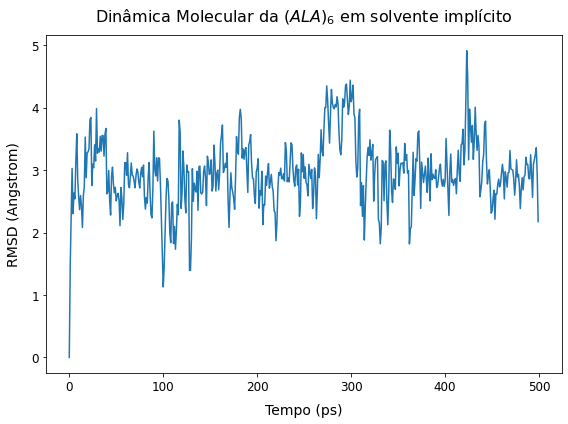

In [ ]:
# RMSD em solvente implícito
rmsd_implicit = pt.rmsd(traj_implicit, ref=0)

# Montagem do gráfico do RMSD ao longo da dinâmica molecular
plt.figure(figsize=(8, 6))
plt.plot(rmsd_implicit)
plt.title('Dinâmica Molecular da $(ALA)_6$ em solvente implícito', fontsize=16, pad = 14)
plt.xlabel('Tempo (ps)', fontsize=14,labelpad=10)
plt.ylabel('RMSD (Angstrom)', fontsize=14,labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show() 

#### Monitoramento de ângulos diedrais

In [ ]:
# Cálculo dos ângulos diedrais ao longo da trajetória
diedros_implicit = pt.multidihedral(traj_implicit, resrange='1-6', dihedral_types="phi psi", dtype='dataframe')

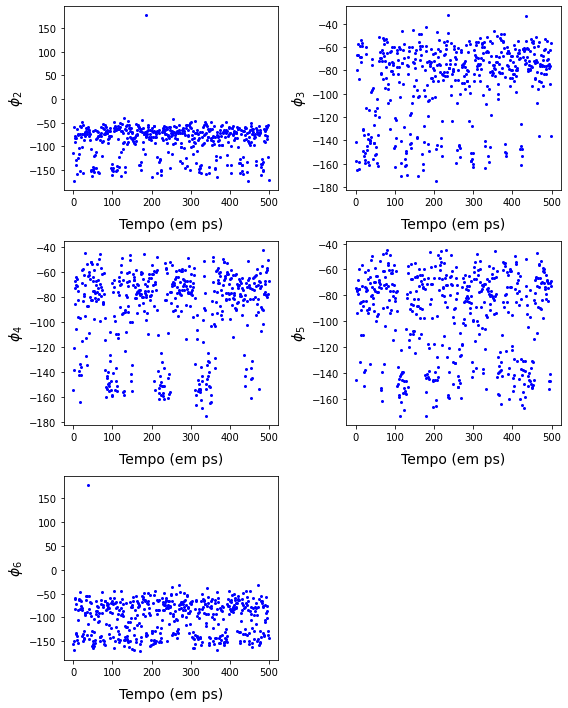

In [ ]:
# Ângulos phi em solvente implícito
nrows, ncols = 3,2
cont = 0
plt.figure(figsize=(8, 10))
for i in range(nrows):
    for j in range(ncols):
        cont += 1
        lab = '$\phi_' + str(cont) + '$'
        lang = 'phi_'+ str(cont)
        if (cont > 1):
            plt.subplot(3, 2, cont - 1)
            plt.plot(diedros_implicit[lang], '-bo', markersize=2, linewidth=0)
            plt.xlabel('Tempo (em ps)', fontsize=14,labelpad=10)
            plt.ylabel(lab, fontsize=14)
plt.tight_layout()
plt.show()        

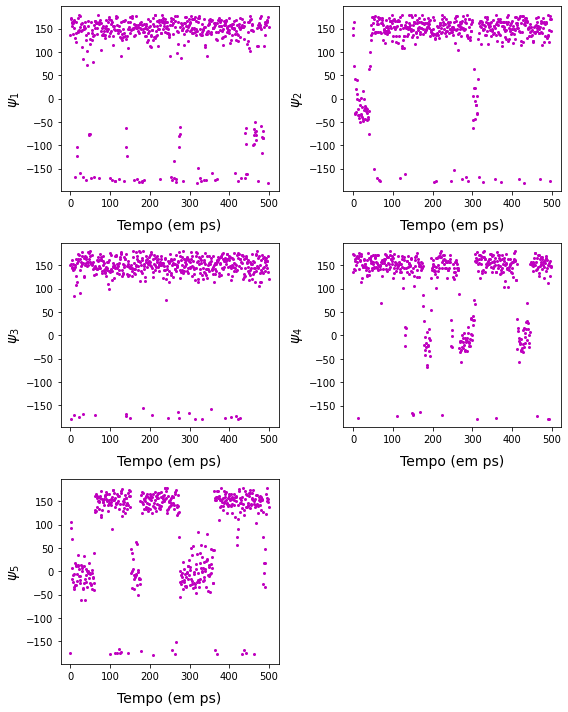

In [ ]:
# Ângulos psi em solvente implícito
nrows, ncols = 3,2
cont = 0
plt.figure(figsize=(8, 10))
for i in range(nrows):
    for j in range(ncols):
        cont += 1
        lab = '$\psi_' + str(cont) + '$'
        lang = 'psi_'+ str(cont)
        if (cont < 6):
            plt.subplot(3, 2, cont)
            plt.plot(diedros_implicit[lang], '-mo', markersize=2, linewidth=0)
            plt.xlabel('Tempo (em ps)', fontsize=14,labelpad=10)
            plt.ylabel(lab, fontsize=14)
plt.tight_layout()
plt.show()        

#### Fração de contatos nativos

In [ ]:
%%file ALA6helix.pdb
ATOM      1  N   ALA     1    -0.000   1.335   0.000  1.00  0.00
ATOM      2  H1  ALA     1     0.952   1.672   0.000  1.00  0.00
ATOM      3  H2  ALA     1    -0.476   1.672  -0.825  1.00  0.00
ATOM      4  H3  ALA     1    -0.000   0.325   0.000  1.00  0.00
ATOM      5  CA  ALA     1    -0.683   1.818   1.183  1.00  0.00
ATOM      6  HA  ALA     1    -0.114   1.460   2.041  1.00  0.00
ATOM      7  CB  ALA     1    -0.748   3.342   1.196  1.00  0.00
ATOM      8  HB1 ALA     1    -1.266   3.676   2.095  1.00  0.00
ATOM      9  HB2 ALA     1     0.263   3.748   1.187  1.00  0.00
ATOM     10  HB3 ALA     1    -1.288   3.690   0.315  1.00  0.00
ATOM     11  C   ALA     1    -2.110   1.291   1.246  1.00  0.00
ATOM     12  O   ALA     1    -2.552   0.811   2.287  1.00  0.00
ATOM     13  N   ALA     2    -2.830   1.383   0.126  1.00  0.00
ATOM     14  H   ALA     2    -2.408   1.788  -0.697  1.00  0.00
ATOM     15  CA  ALA     2    -4.201   0.917   0.056  1.00  0.00
ATOM     16  HA  ALA     2    -4.770   1.512   0.770  1.00  0.00
ATOM     17  CB  ALA     2    -4.771   1.095  -1.347  1.00  0.00
ATOM     18  HB1 ALA     2    -5.800   0.737  -1.369  1.00  0.00
ATOM     19  HB2 ALA     2    -4.748   2.150  -1.617  1.00  0.00
ATOM     20  HB3 ALA     2    -4.172   0.524  -2.057  1.00  0.00
ATOM     21  C   ALA     2    -4.296  -0.560   0.413  1.00  0.00
ATOM     22  O   ALA     2    -5.151  -0.957   1.202  1.00  0.00
ATOM     23  N   ALA     3    -3.414  -1.374  -0.171  1.00  0.00
ATOM     24  H   ALA     3    -2.736  -0.985  -0.810  1.00  0.00
ATOM     25  CA  ALA     3    -3.401  -2.800   0.087  1.00  0.00
ATOM     26  HA  ALA     3    -4.362  -3.188  -0.251  1.00  0.00
ATOM     27  CB  ALA     3    -2.266  -3.484  -0.668  1.00  0.00
ATOM     28  HB1 ALA     3    -2.281  -4.553  -0.456  1.00  0.00
ATOM     29  HB2 ALA     3    -2.394  -3.324  -1.739  1.00  0.00
ATOM     30  HB3 ALA     3    -1.313  -3.064  -0.349  1.00  0.00
ATOM     31  C   ALA     3    -3.214  -3.088   1.569  1.00  0.00
ATOM     32  O   ALA     3    -3.932  -3.904   2.142  1.00  0.00
ATOM     33  N   ALA     4    -2.243  -2.414   2.191  1.00  0.00
ATOM     34  H   ALA     4    -1.687  -1.756   1.663  1.00  0.00
ATOM     35  CA  ALA     4    -1.965  -2.598   3.601  1.00  0.00
ATOM     36  HA  ALA     4    -1.668  -3.639   3.728  1.00  0.00
ATOM     37  CB  ALA     4    -0.844  -1.674   4.065  1.00  0.00
ATOM     38  HB1 ALA     4    -0.657  -1.834   5.126  1.00  0.00
ATOM     39  HB2 ALA     4     0.063  -1.890   3.499  1.00  0.00
ATOM     40  HB3 ALA     4    -1.136  -0.637   3.900  1.00  0.00
ATOM     41  C   ALA     4    -3.194  -2.298   4.446  1.00  0.00
ATOM     42  O   ALA     4    -3.542  -3.070   5.337  1.00  0.00
ATOM     43  N   ALA     5    -3.853  -1.172   4.164  1.00  0.00
ATOM     44  H   ALA     5    -3.516  -0.580   3.419  1.00  0.00
ATOM     45  CA  ALA     5    -5.039  -0.775   4.896  1.00  0.00
ATOM     46  HA  ALA     5    -4.734  -0.634   5.933  1.00  0.00
ATOM     47  CB  ALA     5    -5.619   0.521   4.340  1.00  0.00
ATOM     48  HB1 ALA     5    -6.508   0.795   4.909  1.00  0.00
ATOM     49  HB2 ALA     5    -4.877   1.315   4.421  1.00  0.00
ATOM     50  HB3 ALA     5    -5.887   0.379   3.293  1.00  0.00
ATOM     51  C   ALA     5    -6.120  -1.843   4.810  1.00  0.00
ATOM     52  O   ALA     5    -6.717  -2.210   5.820  1.00  0.00
ATOM     53  N   ALA     6    -6.371  -2.343   3.598  1.00  0.00
ATOM     54  H   ALA     6    -5.845  -1.999   2.807  1.00  0.00
ATOM     55  CA  ALA     6    -7.376  -3.365   3.384  1.00  0.00
ATOM     56  HA  ALA     6    -8.331  -2.931   3.679  1.00  0.00
ATOM     57  CB  ALA     6    -7.424  -3.790   1.920  1.00  0.00
ATOM     58  HB1 ALA     6    -8.187  -4.557   1.790  1.00  0.00
ATOM     59  HB2 ALA     6    -7.665  -2.928   1.299  1.00  0.00
ATOM     60  HB3 ALA     6    -6.453  -4.189   1.626  1.00  0.00
ATOM     61  C   ALA     6    -7.085  -4.603   4.219  1.00  0.00
ATOM     62  O   ALA     6    -7.977  -5.137   4.875  1.00  0.00
ATOM     63  OXT ALA     6    -5.949  -5.073   4.238  1.00  0.00
TER   
END   

Writing ALA6helix.pdb


In [ ]:
# # Lendo o template e visualizando a estrutura
tpl = pt.load('ALA6helix.pdb')
v_tpl = nv.show_pytraj(tpl)
v_tpl.add_ball_and_stick()
v_tpl.add_cartoon()
v_tpl.parameters = dict(camera_type='perpective', background_color='black',fog_near=60, clip_dist=0)
v_tpl

NGLWidget()

In [ ]:
# Importar a biblioteca Pandas
import pandas as pd
print('Versão do Pandas', pd.__version__)

Versão do Pandas 1.3.5


In [ ]:
# Calculando o número de contatos nativos da estrutra de referência, o template
n_cont_template = pt.native_contacts(tpl, ref=tpl, top='peptide.top', dtype='dataframe')
nc_max = n_cont_template.max()
print(nc_max)

Contacts_00001[native]       1540
Contacts_00001[nonnative]       0
dtype: int32


In [ ]:
# Para calcular o número de contatos nativos durante a trajetória
n_cont = pt.native_contacts(traj_implicit, ref=tpl, top='peptide.top', dtype='dataframe')
n_cont.rename(columns={'Contacts_00001[native]': 'Native Contacts',                        'Contacts_00001[nonnative]': 'Non-Native Contacts'}, inplace=True)
fraction_native = n_cont['Native Contacts']/nc_max[0]
fraction_native
# OBS: os valores podem não coincidir pois se trata de trajetórias com pequeno grau de aleatoriedade.

0      0.599351
1      0.612338
2      0.623377
3      0.664286
4      0.661039
         ...   
495    0.625325
496    0.607792
497    0.624675
498    0.622078
499    0.624675
Name: Native Contacts, Length: 500, dtype: float64

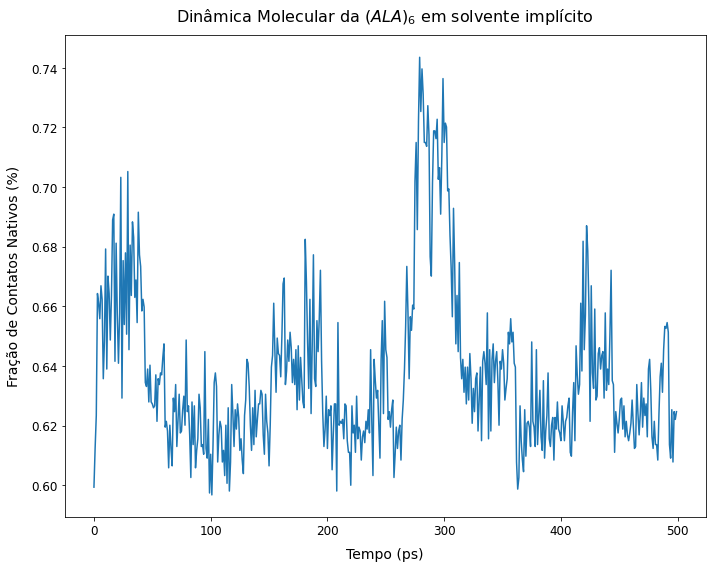

In [ ]:
# Gráfico das frações de contatos nativos ao longo da trajetória
plt.figure(figsize=(10, 8))
plt.plot(fraction_native)
plt.title('Dinâmica Molecular da $(ALA)_6$ em solvente implícito', fontsize=16, pad = 14)
plt.xlabel('Tempo (ps)', fontsize=14,labelpad=10)
plt.ylabel('Fração de Contatos Nativos (%)', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Considerando moléculas de solvente explicitamente

In [ ]:
# Montando a topologia para o sistema solvatado
# OBS: Não usar comentários na caixa que escreve o arquivo "leap_in_water.in"

In [ ]:
%%file leap_in_water.inp
source leaprc.protein.ff14SB
source leaprc.water.tip3p
set default PBRadii mbondi2
seq = sequence{NALA ALA ALA ALA ALA CALA}
charge seq
solvateBox seq TIP3PBOX 10.0
saveamberparm seq peptide_solv.top peptide_solv_ini.crd
savepdb seq peptide_solv_ini.pdb 
quit

Writing leap_in_water.inp


In [ ]:
# Montando a topologia do sistema solvatado
!/usr/local/bin/tleap -f leap_in_water.inp > leap_in_water.log

In [ ]:
# Escrevendo o input para otimizar a geometria do sistema solvatado
# OBS: Não usar comentários na caixa que escreve o arquivo "min_in_water.inp"

In [ ]:
%%file min_in_water.inp
Otm Geo
&cntrl
   imin=1, maxcyc=5000, ntpr=500, ntmin=1, ncyc=500, ntf=1, ntb=1, cut=12.0, igb=0,
&end

Writing min_in_water.inp


In [ ]:
# Comando para otimizar a geometria do sistema solvatado
!/usr/local/bin/sander -O -i min_in_water.inp -p peptide_solv.top -c peptide_solv_ini.crd -r min_solv.rst7

In [ ]:
# Montando uma representação da estrutura otimizada do sistema peptídeo solvatado
from google.colab import output
output.enable_custom_widget_manager()
ref_solv_min = pt.load('min_solv.rst7', top='peptide_solv.top')
view_min_solv = nv.show_pytraj(ref_solv_min)
view_min_solv.clear_representations()

In [ ]:
# Adicionando representações ao objeto view_min_solv e mostrando em tela
view_min_solv.add_ball_and_stick(selection='protein')
view_min_solv.add_ball_and_stick(selection='water', opacity=0.2)
view_min_solv.add_cartoon()
view_min_solv.parameters = dict(camera_type='perpective', background_color='black',fog_near=60, clip_dist=0)
view_min_solv

NGLWidget()

In [ ]:
# Escrevendo o input para dinâmica molecular do sistema solvatado
# OBS: Não usar comentários na caixa que escreve o arquivo "min_in_water.in"

In [ ]:
%%file md_in_water_NVT.inp
MD NVT em água
&cntrl
    nstlim=250000, dt=0.002, ntx=1, irest=0, ntpr=500, ntwr=500, ntwx=500, 
    ntt=3, tempi =250.0, temp0=300.0, tautp=2.0, ig=209858, gamma_ln=2.0, 
    cut=12.0, ntb=1, ntp=0, ntc=2, ntf=2, nrespa=2,
&end

Writing md_in_water_NVT.inp


In [ ]:
# Comando para executar a dinâmica molecular NVT no sistema solvatado
!/usr/local/bin/sander -O -i md_in_water_NVT.inp -o md_in_water_NVT.out -p peptide_solv.top -c min_solv.rst7 -r md_in_water_NVT.rst -x md_in_water_NVT.

^C


In [ ]:
# Carregando a trajetória do sistema solvatado
traj_in_water = pt.load('md_in_water_NVT.nc', top='peptide_solv.top')
traj_in_water

---
# **FIM**